# Linear Algebra Assignment

### Question 1
Using auto-mpg data, find the top 5 similar cars to toyota corona mark ii

In [45]:
import pandas as pd
import numpy as np

df = pd.read_csv('auto-mpg.csv')

toyota = df[df['car name'] == 'toyota corona mark ii'].select_dtypes(include=np.number).dropna().iloc[0]
other_cars = df[df['car name'] != 'toyota corona mark ii'].select_dtypes(include=np.number).dropna()

dot_products = other_cars.apply(lambda row: np.dot(row, toyota), axis=1)
most_sim_cars_indices = dot_products.nlargest(5).index
most_sim_cars = df.loc[most_sim_cars_indices][['car name']]

print("Top 5 similar cars to toyota corona mark ii:")
most_sim_cars

Top 5 similar cars to toyota corona mark ii:


,car name
44,pontiac safari (sw)
103,chevrolet impala
42,dodge monaco (sw)
95,buick electra 225 custom
90,mercury marquis brougham


### Question 2
Find completely unique/orthogonal car to toyota corona mark ii

In [46]:
toyota_features = df[df['car name'] == 'toyota corona mark ii'].select_dtypes(include=np.number).dropna().iloc[0]
other_cars = df[df['car name'] != 'toyota corona mark ii'].select_dtypes(include=np.number).dropna()

def cosine_similarity(vec1, vec2):
  dot_product = np.dot(vec1, vec2)
  norm_vec1 = np.linalg.norm(vec1)
  norm_vec2 = np.linalg.norm(vec2)
  if norm_vec1 == 0 or norm_vec2 == 0:
    return 0
  return dot_product / (norm_vec1 * norm_vec2)

sim = other_cars.apply(lambda row: cosine_similarity(row, toyota_features), axis=1)

least_sim_car_index = sim.nsmallest(1).index[0]
least_sim_car = df.loc[least_sim_car_index][['car name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]

print("Car most orthogonal to 'toyota corona mark ii':")
least_sim_car

Car most orthogonal to 'toyota corona mark ii':


,13
car name,buick estate wagon (sw)
mpg,14.0
cylinders,8
displacement,455.0
horsepower,225
weight,3086
acceleration,10.0
model year,70
origin,1


### Question 3
Project the data to a 2-dimentional space and visualize using scatter plot

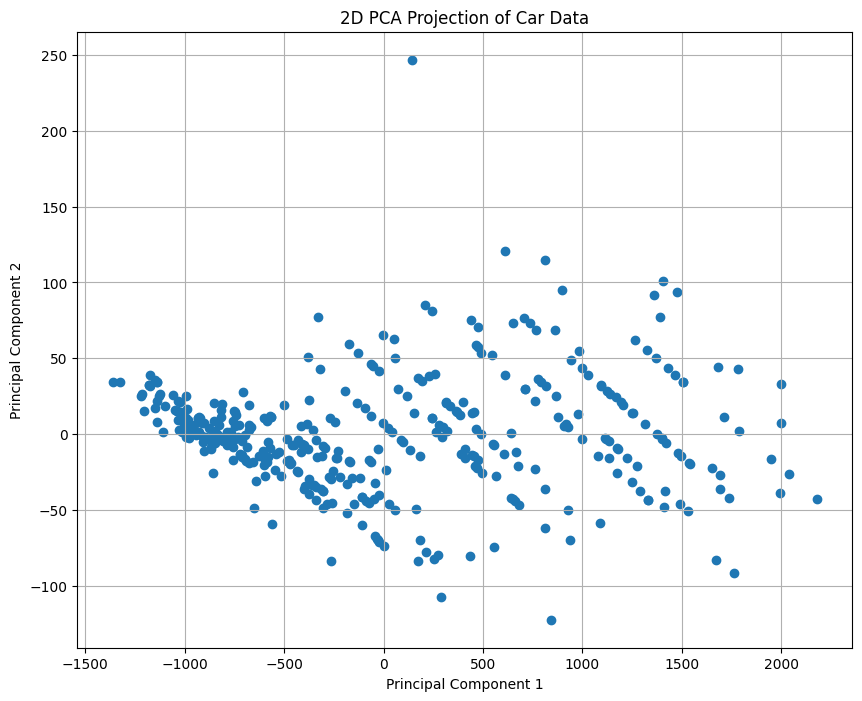

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

num_df = df.select_dtypes(include=np.number).dropna()

pca = PCA(n_components=2)
principal_components = pca.fit_transform(num_df)

pca_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

pca_df['car name'] = df.loc[num_df.index]['car name']

plt.figure(figsize=(10, 8))
plt.scatter(pca_df['principal component 1'], pca_df['principal component 2'])
plt.title('2D PCA Projection of Car Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### Question 4
Write a function that returns dot product of two list of numbers

In [48]:
def dot_product(list1, list2):
    if len(list1) != len(list2):
        return 0
    return sum(x * y for x, y in zip(list1, list2))

list_a = [1, 2, 3]
list_b = [4, 5, 6]
result = dot_product(list_a, list_b)
print(f"The dot product of {list_a} and {list_b} is: {result}")

The dot product of [1, 2, 3] and [4, 5, 6] is: 32


### Question 5
Write a function that returns the projection of vector a onto vector b. Both a and b are given as list of numbers

In [49]:
def vector_projection(a, b):
  if len(a) != len(b):
    raise ValueError("Vectors must have the same length")
  dot_p = dot_product(a, b)
  b_squared = dot_product(b, b)
  if b_squared == 0:
    return [0] * len(a)
  scalar = dot_p / b_squared
  return [scalar * bi for bi in b]

a = [1, 1]
b = [0, 0]
projection_result = vector_projection(a, b)
print(f"The projection of {a} onto {b} is: {projection_result}")

The projection of [1, 1] onto [0, 0] is: [0, 0]


### Question 6
Create a class Vector that supports addition, dot product, and magnitude.

In [50]:
import math

class Vector:
  def __init__(self, components):
    if not isinstance(components, (list, tuple)):
      raise TypeError("Vector components must be a list or tuple.")
    if not components:
      raise ValueError("Vector components cannot be empty.")
    if not all(isinstance(x, (int, float)) for x in components):
        raise TypeError("Vector components must be numbers.")
    self.components = components
    self.dimension = len(components)

  def __add__(self, other):
    if not isinstance(other, Vector):
      raise TypeError("Can only add Vector objects.")
    if self.dimension != other.dimension:
      raise ValueError("Vectors must have the same dimension for addition.")
    return Vector([x + y for x, y in zip(self.components, other.components)])

  def dot(self, other):
    if not isinstance(other, Vector):
      raise TypeError("Can only compute dot product with Vector objects.")
    if self.dimension != other.dimension:
      raise ValueError("Vectors must have the same dimension for dot product.")
    return sum(x * y for x, y in zip(self.components, other.components))

  def magnitude(self):
    return math.sqrt(sum(x**2 for x in self.components))

  def __repr__(self):
    return f"Vector({self.components})"

vector1 = Vector([1, 2, 3])
vector2 = Vector([4, 5, 6])

sum_vector = vector1 + vector2
print(f"Vector 1: {vector1}")
print(f"Vector 2: {vector2}")
print(f"Sum: {sum_vector}")

dot_prod_result = vector1.dot(vector2)
print(f"Dot Product: {dot_prod_result}")

mag_vector1 = vector1.magnitude()
mag_vector2 = vector2.magnitude()
print(f"Magnitude of Vector 1: {mag_vector1}")
print(f"Magnitude of Vector 2: {mag_vector2}")

Vector 1: Vector([1, 2, 3])
Vector 2: Vector([4, 5, 6])
Sum: Vector([5, 7, 9])
Dot Product: 32
Magnitude of Vector 1: 3.7416573867739413
Magnitude of Vector 2: 8.774964387392123


### Question 7
Write a function that returns the L1 and L2 norms of a vector given as list

In [51]:
def get_vector_norms(vector_list):
  l1_norm = sum(abs(x) for x in vector_list)
  l2_norm = math.sqrt(sum(x**2 for x in vector_list))
  return l1_norm, l2_norm

vector = [1, -2, 3, -4]
l1, l2 = get_vector_norms(vector)
print(f"Vector: {vector}")
print(f"L1 Norm: {l1}")
print(f"L2 Norm: {l2}")

Vector: [1, -2, 3, -4]
L1 Norm: 10
L2 Norm: 5.477225575051661
